In [8]:
#DATA LOADING

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np

In [16]:
data = pd.read_excel('customer_data.xlsx')
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [17]:
missing_data = data.isnull().sum()
print("Missing data: ")
missing_data

Missing data: 


CustomerID                  0
Gender                      0
Age                         0
Income                      5
City                        3
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(data[['Income']])
data[['Income']] = imputer.transform(data[['Income']])

In [26]:
imputer_2 = SimpleImputer(strategy = 'most_frequent')
imputer_2.fit(data[['City']])
data[['City']] = imputer_2.transform(data[['City']])

In [28]:
missing_data = data.isnull().sum()
print("Missing data: ")
missing_data

Missing data: 


CustomerID                  0
Gender                      0
Age                         0
Income                      0
City                        0
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

In [30]:
data.dtypes

CustomerID                   object
Gender                       object
Age                           int64
Income                      float64
City                         object
Region                       object
Frequency_of_Purchases        int64
Average_Purchase_Amount     float64
Customer_Lifespan_Months     object
Purchase_Channel             object
Date_of_Purchase             object
Churn_Status                 object
dtype: object

In [32]:
unique_value = data['Customer_Lifespan_Months'].unique()
unique_value

array([3, 4, 1, 2, 5, 'XXXX'], dtype=object)

In [34]:
data = data[data['Customer_Lifespan_Months'] != 'XXXX']

In [36]:
data['Customer_Lifespan_Months'].unique()

array([3, 4, 1, 2, 5], dtype=object)

In [38]:
data['Customer_Lifespan_Months'] = data['Customer_Lifespan_Months'].astype('int64')

In [40]:
data['Date_of_Purchase'] = data['Date_of_Purchase'].astype('datetime64[ns]')

In [42]:
data.dtypes

CustomerID                          object
Gender                              object
Age                                  int64
Income                             float64
City                                object
Region                              object
Frequency_of_Purchases               int64
Average_Purchase_Amount            float64
Customer_Lifespan_Months             int64
Purchase_Channel                    object
Date_of_Purchase            datetime64[ns]
Churn_Status                        object
dtype: object

In [44]:
duplicates = data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No


In [46]:
data.drop_duplicates(inplace=True)

In [48]:
duplicates = data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status


In [50]:
#DATA MANIPULATION

In [52]:
sorted_data = data.sort_values(by = 'Income', ascending = False)
sorted_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
55,C056,Female,29,107662.0,Houston,Northeast,3,47.877,1,In-store,2022-02-11,No
22,C023,Female,41,105186.0,Los Angeles,Midwest,14,137.697,4,Online,2023-07-15,Yes
70,C071,Female,36,103264.0,Los Angeles,Northeast,11,117.394,3,Online,2023-12-22,Yes
32,C033,Female,31,98590.0,Houston,West,7,76.114,2,Online,2023-06-30,No
52,C053,Female,45,90860.0,Houston,Northeast,10,105.287,3,In-store,2023-12-29,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
49,C050,Female,39,29104.0,Houston,Midwest,7,84.461,2,Online,2022-03-17,No
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes


In [54]:
filtered_male_data = data[data['Gender'] == 'Male']
filtered_male_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes


In [56]:
high_purchase_fre_male = filtered_male_data[filtered_male_data['Frequency_of_Purchases'] > 5]
high_purchase_fre_male

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes
18,C019,Male,32,41111.0,Los Angeles,West,14,133.229,4,Online,2023-07-19,Yes
19,C020,Male,28,37050.0,Los Angeles,Midwest,6,71.789,2,Online,2022-04-08,No


In [58]:
churned_male_freq = filtered_male_data.query('Churn_Status == "Yes"')
churned_male_freq

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes
18,C019,Male,32,41111.0,Los Angeles,West,14,133.229,4,Online,2023-07-19,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes
24,C025,Male,27,45239.0,Los Angeles,West,12,127.888,3,In-store,2022-04-04,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes
38,C039,Male,43,51799.0,Houston,West,14,133.540,4,Online,2022-10-26,Yes


In [60]:
churned_male_freq_city = churned_male_freq[churned_male_freq['City'].isin(['Chicago','Houston'])]
churned_male_freq_city

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes
38,C039,Male,43,51799.0,Houston,West,14,133.540,4,Online,2022-10-26,Yes
41,C042,Male,53,52616.0,Houston,Northeast,11,120.311,3,Online,2022-07-15,Yes
42,C043,Male,44,66344.0,Chicago,Midwest,12,130.562,3,In-store,2023-05-17,Yes
45,C046,Male,44,59154.0,Chicago,West,15,152.291,4,Online,2022-12-07,Yes
63,C064,Male,30,58033.0,Houston,West,10,107.919,3,In-store,2023-11-16,Yes
66,C067,Male,54,58033.0,Houston,West,12,128.255,3,Online,2022-03-24,Yes


In [62]:
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [64]:
data.loc[0:4,'CustomerID':'Region']

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [66]:
data.iloc[0:5,0:6]

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [68]:
cust_ls_bw_2_n_5 = data[(data['Customer_Lifespan_Months'] >= 2) & (data['Customer_Lifespan_Months'] <= 5)]
cust_ls_bw_2_n_5

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,1.170120e+02,3,Online,2022-11-30,Yes
6,C007,Female,35,60349.0,Houston,Northeast,9,9.554400e+01,2,In-store,2023-07-20,No
7,C008,Male,38,38401.0,Houston,West,6,7.073000e+01,2,Online,2022-05-24,No
...,...,...,...,...,...,...,...,...,...,...,...,...
72,C073,Male,28,73631.0,Los Angeles,West,9,9.034400e+01,2,In-store,2022-11-20,No
75,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes
77,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No
78,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes


In [70]:
#MERGING AND CONCATENATION

In [72]:
data2 = pd.read_excel('performance_data.xlsx')
data2.head()

,CustomerID,Recency,Frequency_Score,Monetary_Score
0,C001,3,2,2
1,C002,3,3,3
2,C003,4,4,4
3,C004,2,2,2
4,C005,1,1,1


In [74]:
joined_data = pd.merge(data,data2, on = 'CustomerID', how = 'inner')
joined_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1


In [76]:
joined_data.shape

(79, 15)

In [78]:
additional_data = pd.read_excel('additional_data.xlsx')
additional_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [80]:
vr_concat_data = pd.concat([joined_data,additional_data]).reset_index()
vr_concat_data.tail()

,index,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
94,15,C096,Male,32,18600.0,Chicago,Northeast,12,123.003,4,Online,2022-02-03,Yes,4,2,3,C096
95,16,C097,Male,38,68525.0,Chicago,West,13,106.526,4,Online,2023-09-20,Yes,4,3,3,C097
96,17,C098,Female,24,73538.0,Houston,West,3,162.533,1,In-store,2023-11-04,Yes,2,1,1,C098
97,18,C099,Female,20,47251.0,Chicago,Midwest,5,145.404,2,In-store,2022-09-24,No,4,3,1,C099
98,19,C100,Male,39,52054.0,Chicago,Midwest,14,36.975,2,In-store,2023-05-03,No,1,4,4,C100


In [82]:
vr_concat_data = pd.concat([joined_data,additional_data]).reset_index(drop=True)
vr_concat_data.tail()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
94,C096,Male,32,18600.0,Chicago,Northeast,12,123.003,4,Online,2022-02-03,Yes,4,2,3,C096
95,C097,Male,38,68525.0,Chicago,West,13,106.526,4,Online,2023-09-20,Yes,4,3,3,C097
96,C098,Female,24,73538.0,Houston,West,3,162.533,1,In-store,2023-11-04,Yes,2,1,1,C098
97,C099,Female,20,47251.0,Chicago,Midwest,5,145.404,2,In-store,2022-09-24,No,4,3,1,C099
98,C100,Male,39,52054.0,Chicago,Midwest,14,36.975,2,In-store,2023-05-03,No,1,4,4,C100


In [84]:
vr_concat_data = vr_concat_data.drop('CustomerID.1', axis = 1)
vr_concat_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


In [86]:
#EXPLORATORY DATA ANALYSIS

In [88]:
freq_purchase_channel = vr_concat_data['Purchase_Channel'].value_counts()
freq_purchase_channel

Purchase_Channel
Online      65
In-store    34
Name: count, dtype: int64

In [90]:
perc_purchase_channel = freq_purchase_channel/len(vr_concat_data['Purchase_Channel'])*100
perc_purchase_channel

Purchase_Channel
Online      65.656566
In-store    34.343434
Name: count, dtype: float64

In [92]:
round(vr_concat_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
mean,35.0,58115.0,9.0,135687.0,3.0,3.0,3.0,3.0
std,10.0,18618.0,3.0,1349094.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45724.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,98.0,3.0,3.0,3.0,3.0
75%,42.0,71484.0,12.0,121.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,13423412.0,5.0,4.0,4.0,4.0


In [94]:
vr_concat_data = vr_concat_data[vr_concat_data['Average_Purchase_Amount'] != 13423411.958]

In [96]:
round(vr_concat_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
mean,35.0,58131.0,9.0,98.0,3.0,3.0,3.0,3.0
std,10.0,18713.0,3.0,29.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45482.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,97.0,3.0,3.0,3.0,3.0
75%,42.0,71994.0,12.0,120.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,193.0,5.0,4.0,4.0,4.0


In [98]:
grouped_by_city = vr_concat_data.groupby('City')['Average_Purchase_Amount'].median()
grouped_by_city

City
Chicago        102.1860
Houston         87.6615
Los Angeles    100.7250
New York        94.4690
Name: Average_Purchase_Amount, dtype: float64

In [100]:
pivot_table = vr_concat_data.pivot_table(index = 'Churn_Status',
                              values=['Recency','Frequency_Score','Monetary_Score'],
                              aggfunc = {'Churn_Status':'count','Recency': 'mean','Frequency_Score': 'mean','Monetary_Score': 'mean'})
pivot_table

,Churn_Status,Frequency_Score,Monetary_Score,Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


In [102]:
pivot_table = pivot_table.rename(columns = {'Churn_Status':'Freq_churn',
                                            'Recency': 'Mean_Recency',
                                            'Frequency_Score': 'Mean_FS',
                                            'Monetary_Score': 'Mean_MS'})
pivot_table

,Freq_churn,Mean_FS,Mean_MS,Mean_Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


In [104]:
cross_tab1 = pd.crosstab(vr_concat_data['Region'],vr_concat_data['Purchase_Channel'])
cross_tab1

Purchase_Channel,In-store,Online
Region,,
Midwest,10,26
Northeast,10,18
West,13,21


In [106]:
cross_tab2 = pd.crosstab(vr_concat_data['City'],vr_concat_data['Churn_Status'])
cross_tab2

Churn_Status,No,Yes
City,,
Chicago,8,17
Houston,16,16
Los Angeles,10,14
New York,9,8


In [108]:
num_variable = vr_concat_data.select_dtypes(include=['number']).columns

In [110]:
num_variable

Index(['Age', 'Income', 'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Recency', 'Frequency_Score',
       'Monetary_Score'],
      dtype='object')

In [112]:
correl = round(vr_concat_data[num_variable].corr(),3)
correl

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
Age,1.000,0.110,0.301,0.170,0.334,-0.048,-0.006,0.065
Income,0.110,1.000,-0.022,0.023,0.068,0.178,0.163,0.162
Frequency_of_Purchases,0.301,-0.022,1.000,0.704,0.762,-0.063,-0.065,-0.066
Average_Purchase_Amount,0.170,0.023,0.704,1.000,0.690,-0.029,-0.145,-0.191
Customer_Lifespan_Months,0.334,0.068,0.762,0.690,1.000,-0.073,-0.013,-0.001
Recency,-0.048,0.178,-0.063,-0.029,-0.073,1.000,0.761,0.743
Frequency_Score,-0.006,0.163,-0.065,-0.145,-0.013,0.761,1.000,0.819
Monetary_Score,0.065,0.162,-0.066,-0.191,-0.001,0.743,0.819,1.000


In [114]:
#DATA VISUALIZATION

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

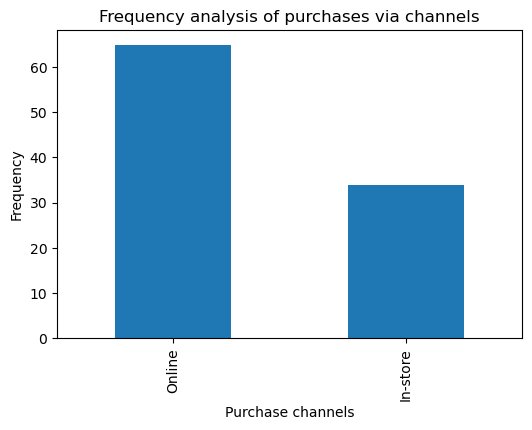

In [117]:
plt.figure(figsize=(6,4))
freq_purchase_channel.plot(kind='bar')
plt.title('Frequency analysis of purchases via channels')
plt.xlabel('Purchase channels')
plt.ylabel('Frequency')
plt.show()

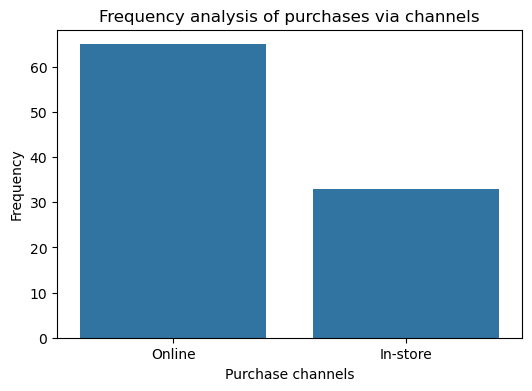

In [118]:
plt.figure(figsize=(6,4))
sns.countplot(x='Purchase_Channel', data = vr_concat_data)
plt.title('Frequency analysis of purchases via channels')
plt.xlabel('Purchase channels')
plt.ylabel('Frequency')
plt.show()

<Figure size 600x400 with 0 Axes>

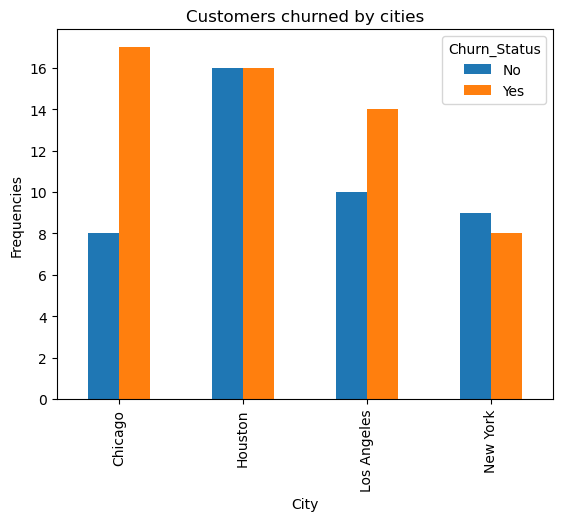

In [120]:
plt.figure(figsize=(6,4))
cross_tab2.plot(kind='bar', stacked=False)
plt.title('Customers churned by cities')
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.show()

<Figure size 600x400 with 0 Axes>

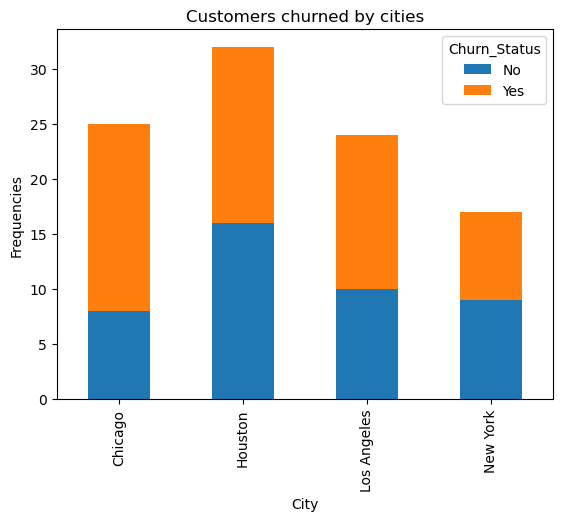

In [124]:
plt.figure(figsize=(6,4))
cross_tab2.plot(kind='bar', stacked=True)
plt.title('Customers churned by cities')
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.show()

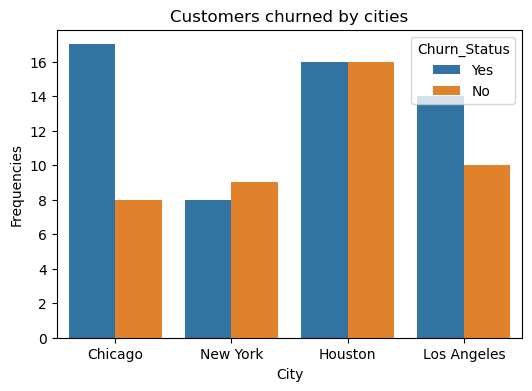

In [126]:
plt.figure(figsize=(6,4))
sns.countplot(x='City', hue='Churn_Status', data = vr_concat_data)
plt.title('Customers churned by cities')
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.show()

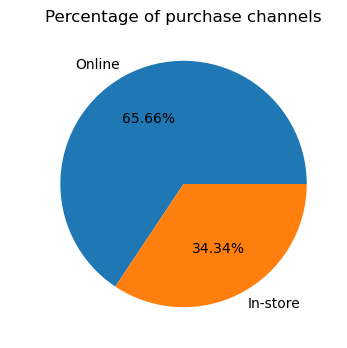

In [128]:
plt.figure(figsize=(6,4))
perc_purchase_channel.plot(kind='pie',autopct='%1.2f%%')
plt.title('Percentage of purchase channels')
plt.ylabel(' ')
plt.show()

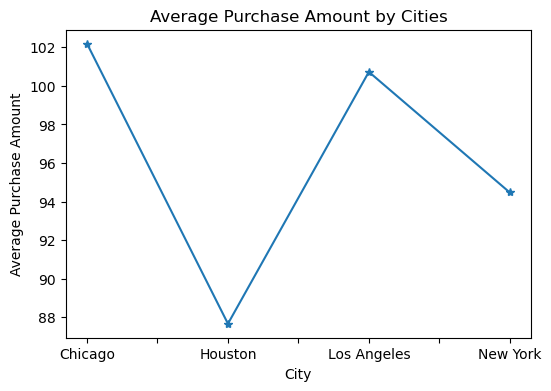

In [130]:
plt.figure(figsize=(6,4))
grouped_by_city.plot(kind='line',marker='*')
plt.title('Average Purchase Amount by Cities')
plt.xlabel('City')
plt.ylabel('Average Purchase Amount')
plt.show()

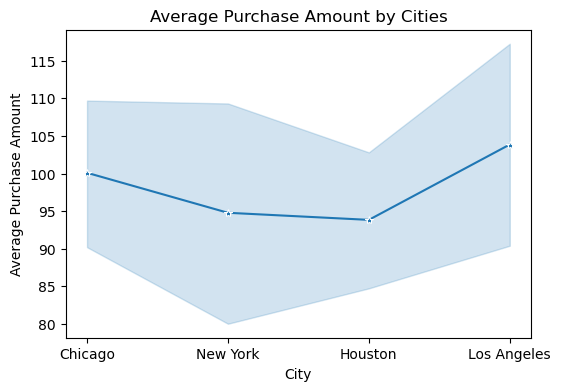

In [132]:
plt.figure(figsize=(6,4))
sns.lineplot(x= 'City', y = 'Average_Purchase_Amount', data = vr_concat_data, marker = '*')
plt.title('Average Purchase Amount by Cities')
plt.xlabel('City')
plt.ylabel('Average Purchase Amount')
plt.show()

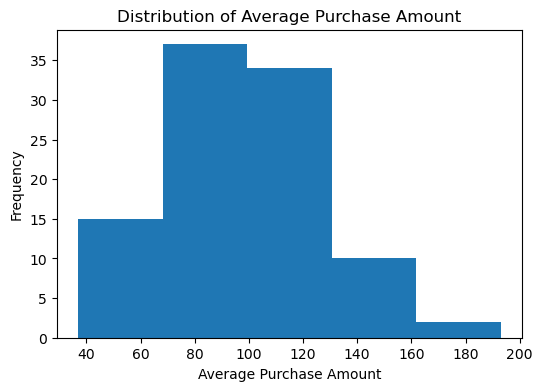

In [134]:
plt.figure(figsize=(6,4))
vr_concat_data['Average_Purchase_Amount'].plot(kind='hist',bins=5)
plt.title('Distribution of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Frequency')
plt.show()

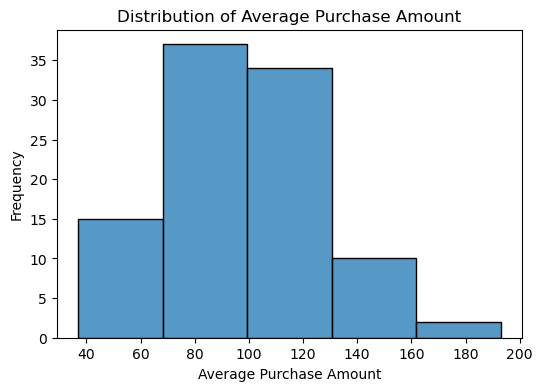

In [136]:
plt.figure(figsize=(6,4))
sns.histplot(vr_concat_data['Average_Purchase_Amount'],bins=5)
plt.title('Distribution of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [138]:
#ADVANCED VISUALIZATION

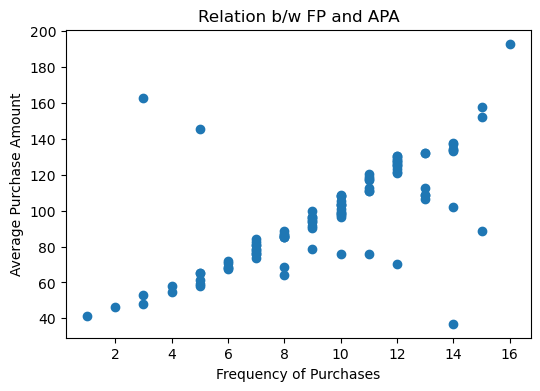

In [140]:
plt.figure(figsize=(6,4))
plt.scatter(vr_concat_data['Frequency_of_Purchases'], vr_concat_data['Average_Purchase_Amount'])
plt.title('Relation b/w FP and APA')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Purchase Amount')
plt.show()

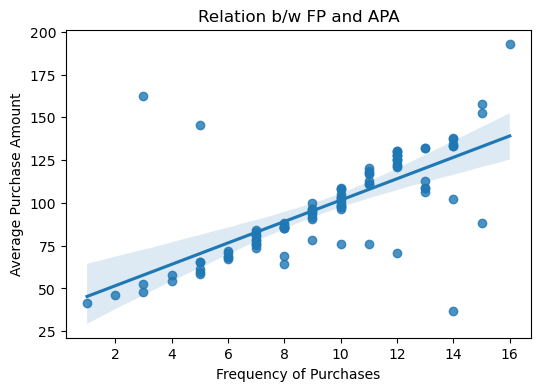

In [142]:
plt.figure(figsize=(6,4))
sns.regplot(x = 'Frequency_of_Purchases', y = 'Average_Purchase_Amount', data = vr_concat_data)
plt.title('Relation b/w FP and APA')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Purchase Amount')
plt.show()

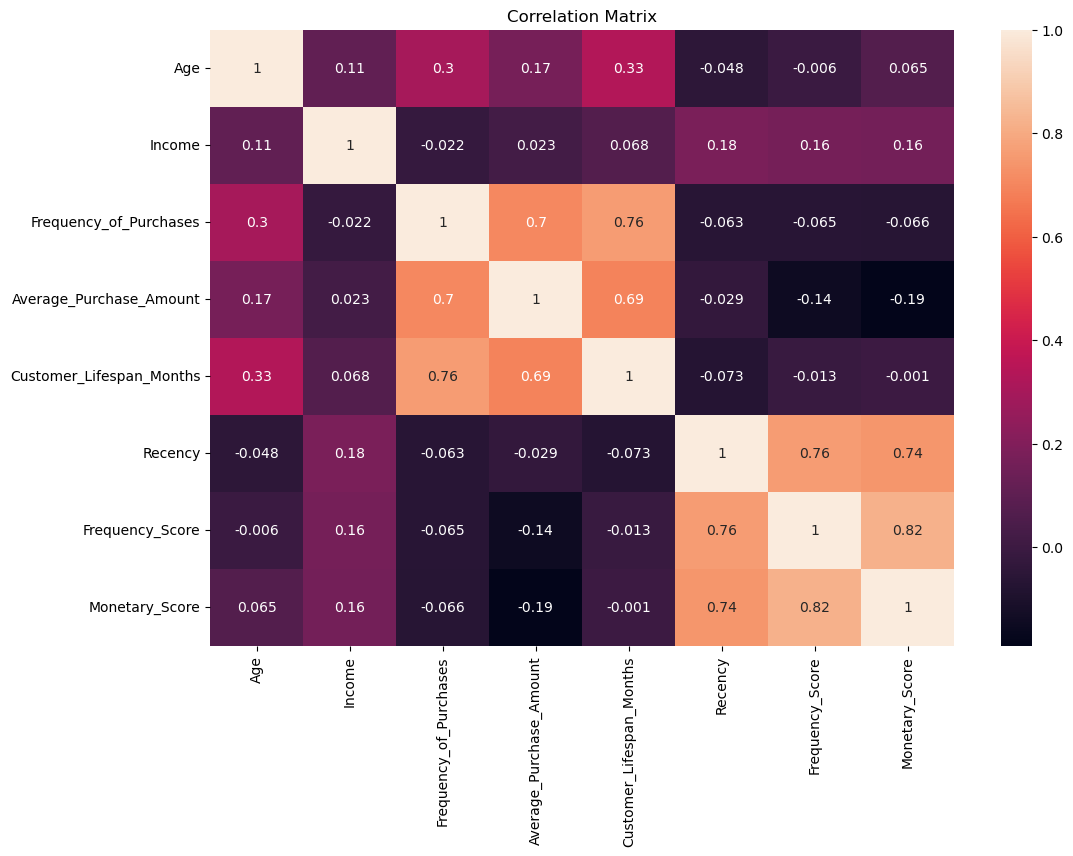

In [144]:
plt.figure(figsize=(12,8))
sns.heatmap(correl,annot=True)
plt.title('Correlation Matrix')
plt.show()

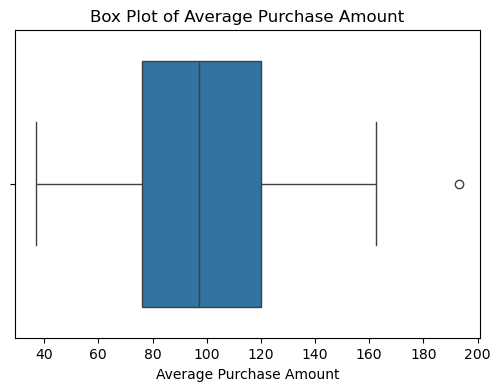

In [146]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Average_Purchase_Amount', data = vr_concat_data)
plt.title('Box Plot of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.show()

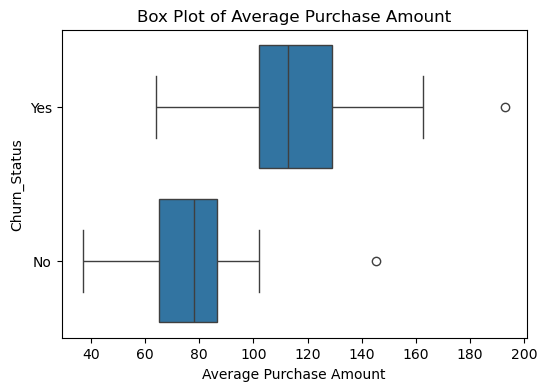

In [148]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Average_Purchase_Amount', y = 'Churn_Status', data = vr_concat_data)
plt.title('Box Plot of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.show()

In [150]:
#DATA TRANSFORMATION

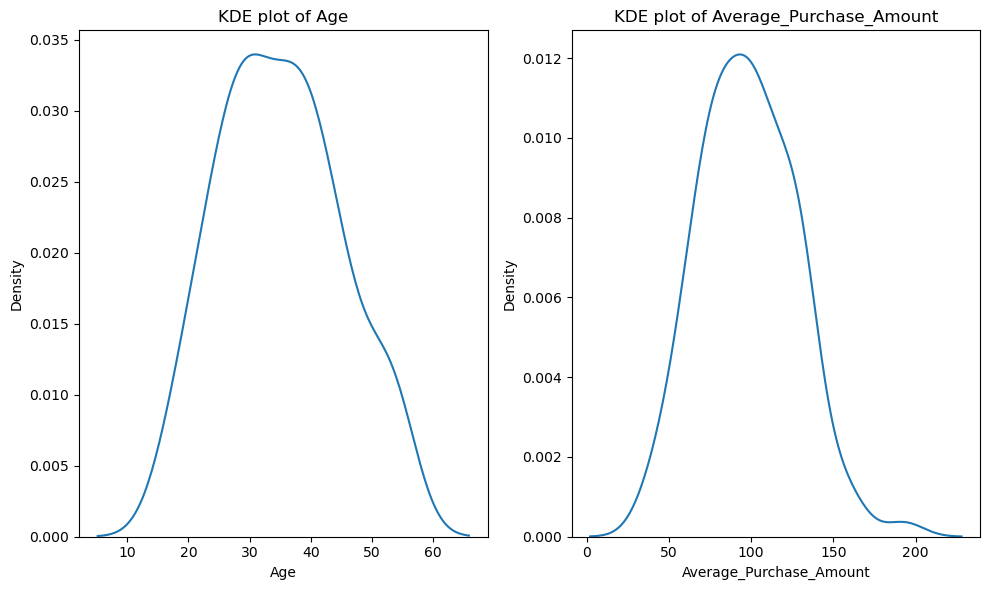

In [152]:
numeric_column = ['Age','Average_Purchase_Amount']
fig,axes = plt.subplots(1,2,figsize=(10,6))
for index, column in enumerate(numeric_column):
    sns.kdeplot(vr_concat_data[column], ax=axes[index])
    axes[index].set_title(f'KDE plot of {column}')
plt.tight_layout()
plt.show()

In [154]:
from scipy.stats import shapiro

In [156]:
shapiro_results = {}
for column in numeric_column:
    stat,p_value = shapiro(vr_concat_data[column])
    shapiro_results[column] = round(p_value,3)
shapiro_results

{'Age': 0.037, 'Average_Purchase_Amount': 0.487}

In [158]:
import numpy as np

In [160]:
def sqrt_transformation(data,column_name):
    data[f'{column_name}_sqrt'] = np.sqrt(data[column_name])
    stat,p_value = shapiro(data[f'{column_name}_sqrt'])
    kdeplot = sns.kdeplot(data[f'{column_name}_sqrt'])
    print(kdeplot)
    print('p_value: ',p_value)

Axes(0.125,0.11;0.775x0.77)
p_value:  0.09854088997154391


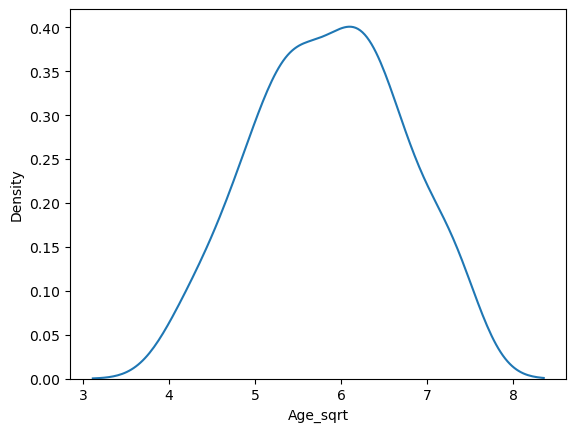

In [162]:
sqrt_transformation(vr_concat_data,'Age')

In [164]:
vr_concat_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


In [166]:
def log_transformation(data,column_name):
    data[f'{column_name}_log'] = np.log(data[column_name])
    stat,p_value = shapiro(data[f'{column_name}_log'])
    kdeplot = sns.kdeplot(data[f'{column_name}_log'])
    print(kdeplot)
    print('p_value: ',p_value)

Axes(0.125,0.11;0.775x0.77)
p_value:  0.03301636122262527


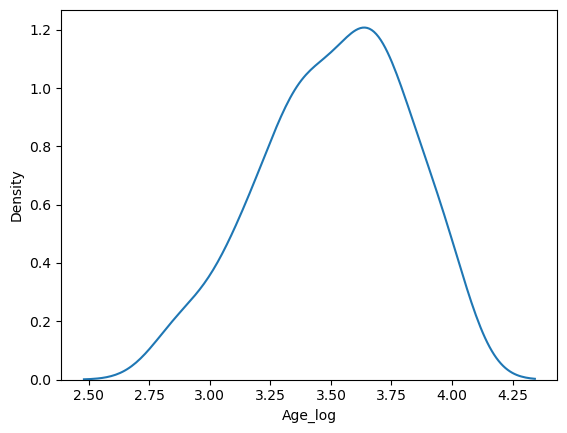

In [168]:
log_transformation(vr_concat_data,'Age')

In [170]:
vr_concat_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Age_log
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,3.891820
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,3.637586
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,2.833213
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,3.526361
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,3.401197


In [172]:
vr_concat_data = vr_concat_data.drop('Age_log',axis=1)
vr_concat_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


In [174]:
#ADVANCED DATA TRANSFORMATION

In [176]:
from scipy.stats import boxcox

In [178]:
def boxcox_transformation(data,column_name):
    transformed_data,_ = boxcox(data[column_name])
    data[f'{column_name}_boxcox'] = transformed_data
    stat,p_value = shapiro(data[f'{column_name}_boxcox'])
    kdeplot = sns.kdeplot(data[f'{column_name}_boxcox'])
    print(kdeplot)
    print('p_value: ',p_value)

Axes(0.125,0.11;0.775x0.77)
p_value:  0.09806346287541204


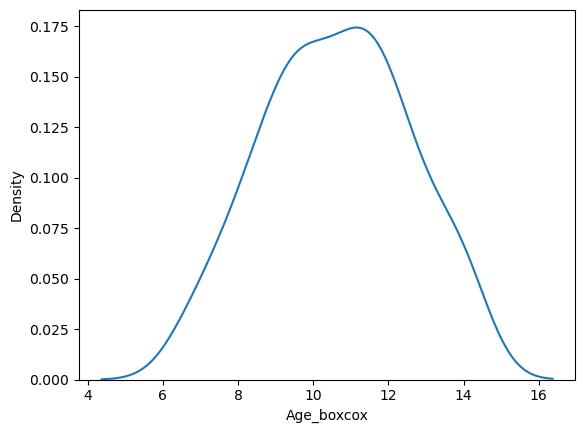

In [180]:
boxcox_transformation(vr_concat_data,'Age')

In [182]:
from scipy.stats import yeojohnson

In [184]:
def yeojohnson_transformation(data,column_name):
    transformed_data,_ = yeojohnson(data[column_name])
    data[f'{column_name}_yeojohnson'] = transformed_data
    stat,p_value = shapiro(data[f'{column_name}_yeojohnson'])
    kdeplot = sns.kdeplot(data[f'{column_name}_yeojohnson'])
    print(kdeplot)
    print('p_value: ',p_value)

Axes(0.125,0.11;0.775x0.77)
p_value:  0.09733558153015867


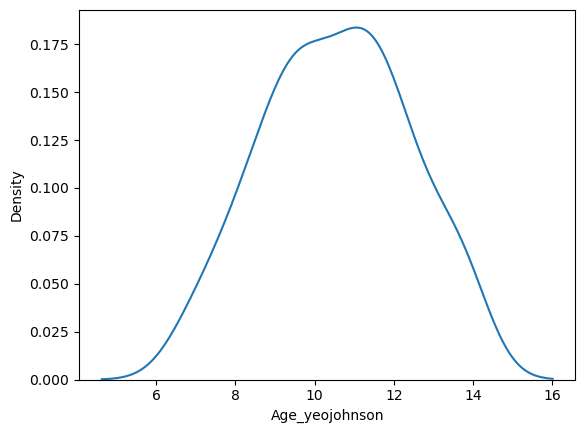

In [186]:
yeojohnson_transformation(vr_concat_data,'Age')

In [188]:
preprocessed_data = vr_concat_data.drop(['Age','Age_boxcox','Age_yeojohnson'], axis=1)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


In [190]:
#STATISTICS AND HYPOTHESIS TESTING

In [192]:
from scipy import stats

In [194]:
hypothesized_mean = 68
t_stat,p_value = stats.ttest_1samp(preprocessed_data['Average_Purchase_Amount'],hypothesized_mean)
print('P_value: ',p_value)

if p_value < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

P_value:  3.765882799621164e-17
Reject null hypothesis


In [196]:
churned_cust = preprocessed_data.query('Churn_Status == "Yes"')['Average_Purchase_Amount']
existing_cust = preprocessed_data.query('Churn_Status == "No"')['Average_Purchase_Amount']
t_stat,p_value = stats.ttest_ind(churned_cust,existing_cust)
print('P_value: ',p_value)

if p_value < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

P_value:  1.077550720319448e-13
Reject null hypothesis


In [198]:
churned_cust.mean()

114.96134545454547

In [200]:
existing_cust.mean()

76.42560465116279

In [202]:
stat,p_value = shapiro(preprocessed_data['Frequency_of_Purchases'])
print(p_value)

0.11246168308148519


In [204]:
chicago_cust = preprocessed_data.query('City == "Chicago"')['Frequency_of_Purchases']
newyork_cust = preprocessed_data.query('City == "New York"')['Frequency_of_Purchases']
houston_cust = preprocessed_data.query('City == "Houston"')['Frequency_of_Purchases']
losangeles_cust = preprocessed_data.query('City == "Los Angeles"')['Frequency_of_Purchases']
t_stat,p_value = stats.f_oneway(chicago_cust,newyork_cust,houston_cust,losangeles_cust)
print('P_value: ',p_value)

if p_value < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

P_value:  0.0937561908706892
Fail to reject null hypothesis


In [206]:
from scipy.stats import levene

In [208]:
stat,p_value =levene(chicago_cust,newyork_cust,houston_cust,losangeles_cust)
print('P_value: ',p_value)

P_value:  0.500791837582151


In [210]:
#ADVANCED HYPOTHESIS TESTS

In [212]:
from scipy.stats import chi2_contingency

In [214]:
cross_tab = pd.crosstab(preprocessed_data['Purchase_Channel'],preprocessed_data['Region'])
chi_2,p_value,dof,expected = chi2_contingency(cross_tab)

print('P_value: ',p_value)

if p_value < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

P_value:  0.628361041713461
Fail to reject null hypothesis


In [216]:
from scipy.stats import pearsonr

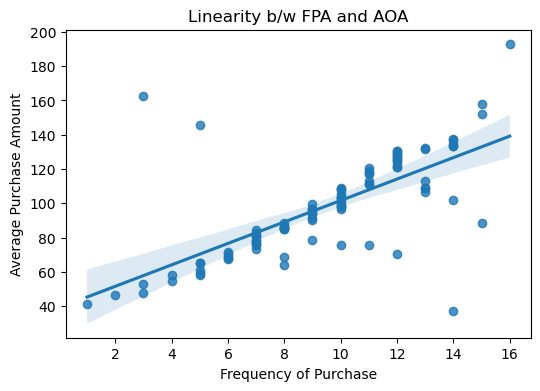

In [218]:
plt.figure(figsize=(6,4))
sns.regplot(x='Frequency_of_Purchases', y='Average_Purchase_Amount', data=preprocessed_data)
plt.title('Linearity b/w FPA and AOA')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Purchase Amount')
plt.show()

In [220]:
purchase_freq = preprocessed_data['Frequency_of_Purchases']
purchase_amt = preprocessed_data['Average_Purchase_Amount']

corr, p_value = pearsonr(purchase_freq,purchase_amt)
print('Correlation_coeff: ',corr)
print('P_value: ',p_value)

if p_value < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Correlation_coeff:  0.7039911501130027
P_value:  6.176786543554943e-16
Reject null hypothesis


In [222]:
import statsmodels.api as sm

In [223]:
x = preprocessed_data['Frequency_of_Purchases']
y = preprocessed_data['Average_Purchase_Amount']

x_constant = sm.add_constant(x)
model = sm.OLS(y,x_constant).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Average_Purchase_Amount   R-squared:                       0.496
Model:                                 OLS   Adj. R-squared:                  0.490
Method:                      Least Squares   F-statistic:                     94.33
Date:                     Sun, 09 Nov 2025   Prob (F-statistic):           6.18e-16
Time:                             15:21:26   Log-Likelihood:                -435.04
No. Observations:                       98   AIC:                             874.1
Df Residuals:                           96   BIC:                             879.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [224]:
predicted_APA = 39.0765 + (6.2551 * 112)
predicted_APA

739.6477

In [228]:
#FEATURE ENGINEERING

In [230]:
preprocessed_data['Customer_value'] = preprocessed_data['Frequency_of_Purchases'] * preprocessed_data['Average_Purchase_Amount']

In [232]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,982.410
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,2364.600
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,41.252
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,403.974
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,158.289


In [234]:
preprocessed_data['Customer_lifetime_value'] = preprocessed_data['Customer_value'] * preprocessed_data['Customer_Lifespan_Months']

In [236]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,Customer_lifetime_value
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,982.410,2947.230
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,2364.600,9458.400
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,41.252,41.252
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,403.974,403.974
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,158.289,158.289


In [238]:
preprocessed_data['Date_of_Purchase'] = preprocessed_data['Date_of_Purchase'].astype('datetime64[ns]')

In [240]:
preprocessed_data['Year'] = preprocessed_data['Date_of_Purchase'].dt.year
preprocessed_data['Month'] = preprocessed_data['Date_of_Purchase'].dt.month
preprocessed_data['Day'] = preprocessed_data['Date_of_Purchase'].dt.day

In [242]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,Customer_lifetime_value,Year,Month,Day
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1,5.477226,158.289,158.289,2022,9,23


In [244]:
preprocessed_data = preprocessed_data.drop('Date_of_Purchase', axis=1) 

In [246]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,Customer_lifetime_value,Year,Month,Day
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,Yes,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,Yes,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,No,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,No,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,No,1,1,1,5.477226,158.289,158.289,2022,9,23


In [248]:
from sklearn.preprocessing import LabelEncoder

In [250]:
encoder = LabelEncoder()
preprocessed_data['Churn_Status'] = encoder.fit_transform(preprocessed_data['Churn_Status'])

In [252]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,Customer_lifetime_value,Year,Month,Day
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23


In [254]:
preprocessed_data['engagement_level'] = pd.cut(preprocessed_data['Customer_Lifespan_Months'],
                                               bins = [0,2,3,5],
                                               labels = ['Low engaged', 'Moderately engaged', 'Highly engaged'],
                                               include_lowest = True)                                               

In [256]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,Customer_lifetime_value,Year,Month,Day,engagement_level
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5,Moderately engaged
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8,Highly engaged
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30,Low engaged
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1,Low engaged
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23,Low engaged


In [258]:
mapping = {'Low engaged':1, 'Moderately engaged':2, 'Highly engaged':3}
preprocessed_data['engagement_level'] = preprocessed_data['engagement_level'].map(mapping)

In [260]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,Customer_lifetime_value,Year,Month,Day,engagement_level
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5,2
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8,3
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30,1
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23,1


In [262]:
preprocessed_data.columns

Index(['CustomerID', 'Gender', 'Income', 'City', 'Region',
       'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Purchase_Channel', 'Churn_Status',
       'Recency', 'Frequency_Score', 'Monetary_Score', 'Age_sqrt',
       'Customer_value', 'Customer_lifetime_value', 'Year', 'Month', 'Day',
       'engagement_level'],
      dtype='object')

In [280]:
dummies = pd.get_dummies(preprocessed_data[['Gender','City', 'Region','Purchase_Channel']]).astype(int)
processed_data = pd.concat([preprocessed_data,dummies], axis=1)

In [282]:
processed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,...,1,1,0,0,0,0,1,0,0,1
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,...,0,0,0,0,1,0,0,1,1,0
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,...,1,0,0,0,1,0,1,0,0,1
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,...,1,1,0,0,0,1,0,0,1,0
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,...,1,0,1,0,0,1,0,0,0,1


In [284]:
#DATA PREPROCESSING

In [286]:
processed_data.columns

Index(['CustomerID', 'Gender', 'Income', 'City', 'Region',
       'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Purchase_Channel', 'Churn_Status',
       'Recency', 'Frequency_Score', 'Monetary_Score', 'Age_sqrt',
       'Customer_value', 'Customer_lifetime_value', 'Year', 'Month', 'Day',
       'engagement_level', 'Gender_Female', 'Gender_Male', 'City_Chicago',
       'City_Houston', 'City_Los Angeles', 'City_New York', 'Region_Midwest',
       'Region_Northeast', 'Region_West', 'Purchase_Channel_In-store',
       'Purchase_Channel_Online'],
      dtype='object')

In [290]:
x_reg = processed_data.drop(['CustomerID', 'Gender', 'City', 'Region','Purchase_Channel','Customer_lifetime_value'],axis=1)
y_reg = processed_data['Customer_lifetime_value']

In [292]:
x_class = processed_data.drop(['CustomerID', 'Gender', 'City', 'Region','Purchase_Channel','Churn_Status'],axis=1)
y_class = processed_data['Churn_Status']

In [298]:
from sklearn.preprocessing import StandardScaler

In [300]:
scaler = StandardScaler()
scaled_x_reg = scaler.fit_transform(x_reg)

In [304]:
scaled_x_reg

array([[ 0.77203698,  0.1759198 ,  0.0065207 , ..., -0.72886899,
        -0.7125253 ,  0.7125253 ],
       [-0.92657088,  1.71521804,  2.06462675, ...,  1.37198868,
         1.40345893, -1.40345893],
       [ 0.27942297, -2.59481703, -1.96808166, ..., -0.72886899,
        -0.7125253 ,  0.7125253 ],
       ...,
       [ 0.82757758, -1.97909774,  2.23416349, ...,  1.37198868,
         1.40345893, -1.40345893],
       [-0.58441068, -1.36337844,  1.64066362, ..., -0.72886899,
         1.40345893, -1.40345893],
       [-0.32642081,  1.40735839, -2.11627472, ..., -0.72886899,
         1.40345893, -1.40345893]])

In [306]:
from sklearn.preprocessing import MinMaxScaler

In [326]:
scaler_2 = MinMaxScaler()
scaled_x_class = scaler_2.fit_transform(x_class).round()

In [328]:
scaled_x_class

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [330]:
from sklearn.decomposition import PCA

In [332]:
pca = PCA()
temp_pca = pca.fit_transform(x_reg)
evr = pca.explained_variance_ratio_

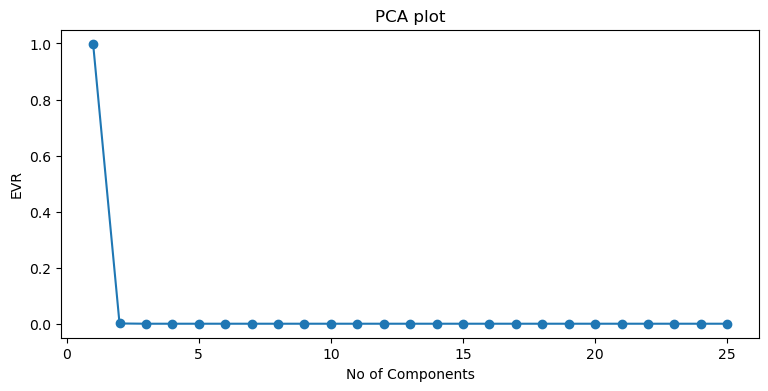

In [336]:
plt.figure(figsize=(9,4))
plt.plot(range(1,len(evr)+1),evr,marker='o')
plt.title('PCA plot')
plt.xlabel('No of Components')
plt.ylabel('EVR')
plt.show()

In [340]:
pca = PCA(n_components = 1)
x_reg_pca = pca.fit_transform(x_reg)

In [342]:
x_reg_pca

array([[ 14373.01560228],
       [-17249.38356613],
       [  5201.60849018],
       [  -101.23328921],
       [ 20757.65810745],
       [ 18339.14711479],
       [  2217.96375301],
       [-19730.22289454],
       [ 14974.23918998],
       [  7210.05960872],
       [-30172.97933551],
       [ 20285.88550562],
       [-12922.95926645],
       [ 12334.11987952],
       [-25631.03026789],
       [  1083.06312798],
       [ 17595.33197785],
       [ 28599.15373937],
       [-17019.59986233],
       [-21081.21971087],
       [-16388.31228774],
       [ 20856.82260722],
       [ 47055.42131797],
       [-30470.75218522],
       [-12891.74270147],
       [-24450.28019793],
       [  9452.42173712],
       [  2912.03719554],
       [  1382.2521624 ],
       [ -7459.66461148],
       [ 23862.21994593],
       [ -2918.77982109],
       [ 40458.81833556],
       [ 20072.26666329],
       [ -8092.17847666],
       [-14660.26529569],
       [ 25628.88451671],
       [ 14568.63044944],
       [ -63

In [344]:
from sklearn.model_selection import train_test_split

In [346]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(scaled_x_reg, y_reg, test_size = 0.2, random_state = 42)

In [352]:
x_reg_train.shape

(78, 25)

In [354]:
x_reg_test.shape

(20, 25)

In [356]:
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(scaled_x_class, y_class, test_size = 0.2, random_state = 42)

In [360]:
x_class_train.shape

(78, 25)

In [362]:
#LINEAR REGRESSION

In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [366]:
lr_model = LinearRegression()
lr_model.fit(x_reg_train, y_reg_train)

y_lr_pred = lr_model.predict(x_reg_test)

mse_lr = mean_squared_error(y_reg_test,y_lr_pred)
print('Mean Squared Error: ',mse_lr)

Mean Squared Error:  118614.30039662475


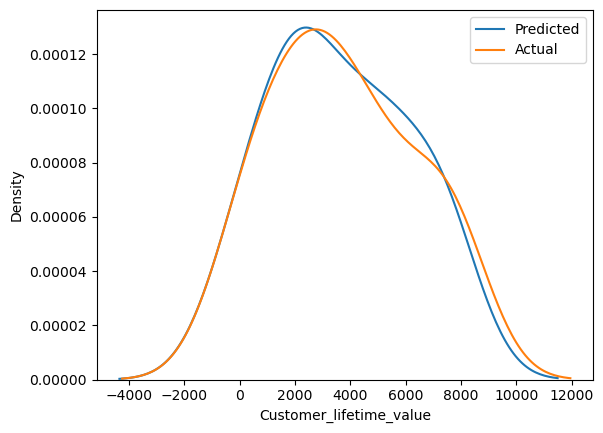

In [368]:
sns.kdeplot(y_lr_pred, label = 'Predicted')
sns.kdeplot(y_reg_test, label = 'Actual')
plt.legend()
plt.show()

In [390]:
from sklearn.tree import DecisionTreeRegressor

In [402]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_reg_train, y_reg_train)

y_dtr_pred = dtr_model.predict(x_reg_test)

mse_dtr = mean_squared_error(y_reg_test,y_dtr_pred)
print('Mean Squared Error: ',mse_dtr)

Mean Squared Error:  463681.5027865999


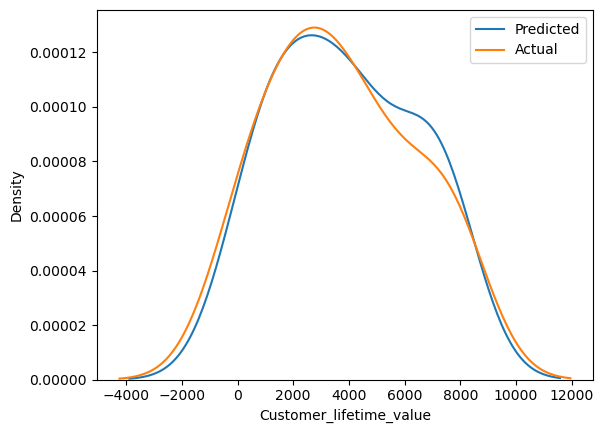

In [404]:
sns.kdeplot(y_dtr_pred, label = 'Predicted')
sns.kdeplot(y_reg_test, label = 'Actual')
plt.legend()
plt.show()

In [400]:
from sklearn.ensemble import RandomForestRegressor

In [459]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_reg_train, y_reg_train)

y_rfr_pred = rf_model.predict(x_reg_test)

mse_rfr = mean_squared_error(y_reg_test,y_rfr_pred)
print('Mean Squared Error: ',mse_rfr)

Mean Squared Error:  210739.71524206345


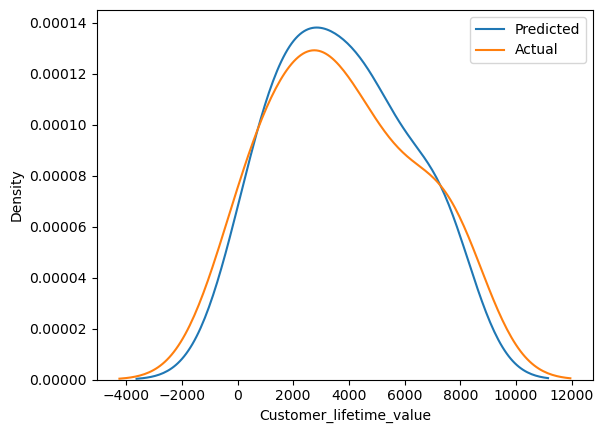

In [461]:
sns.kdeplot(y_rf_pred, label = 'Predicted')
sns.kdeplot(y_reg_test, label = 'Actual')
plt.legend()
plt.show()

In [463]:
y_lr_pred

array([2632.21788252, 4679.66029909, 4988.86996444, 7336.01323656,
       2030.68716703, 5318.97320491, 2028.33788121, 5384.68350441,
       2711.72155397, 2640.21400377, 4542.61119704, 7085.77914591,
       1488.64133811, 7387.20364932, 1567.75375636,  134.20959305,
       7324.26251983, 3416.24317872, -233.70202451,  332.63155585])

In [416]:
#LOGISTIC REGRESSION

In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [424]:
lgr_model = LogisticRegression()
lgr_model.fit(x_class_train, y_class_train)

y_lgr_pred = lgr_model.predict(x_class_test)

accuracy_lgr = accuracy_score(y_class_test,y_lgr_pred)
print(accuracy_lgr*100,'%')

85.0 %


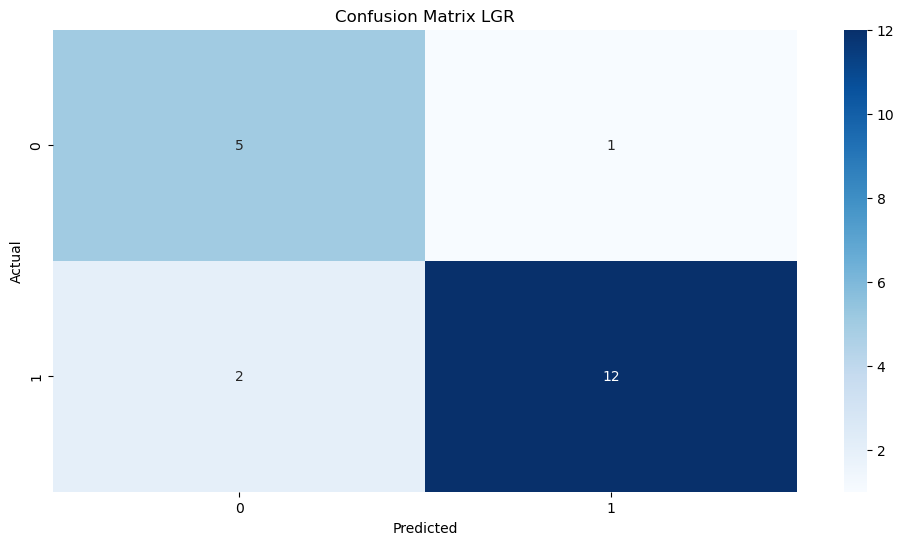

In [434]:
matrix_lgr = confusion_matrix(y_class_test,y_lgr_pred)
plt.figure(figsize=(12,6))
sns.heatmap(matrix_lgr,annot=True,fmt="d",cmap="Blues")
plt.title('Confusion Matrix LGR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [436]:
from sklearn.tree import DecisionTreeClassifier

In [445]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_class_train, y_class_train)

y_dtc_pred = dtc_model.predict(x_class_test)

accuracy_dtc = accuracy_score(y_class_test,y_dtc_pred)
print(accuracy_dtc*100,'%')

65.0 %


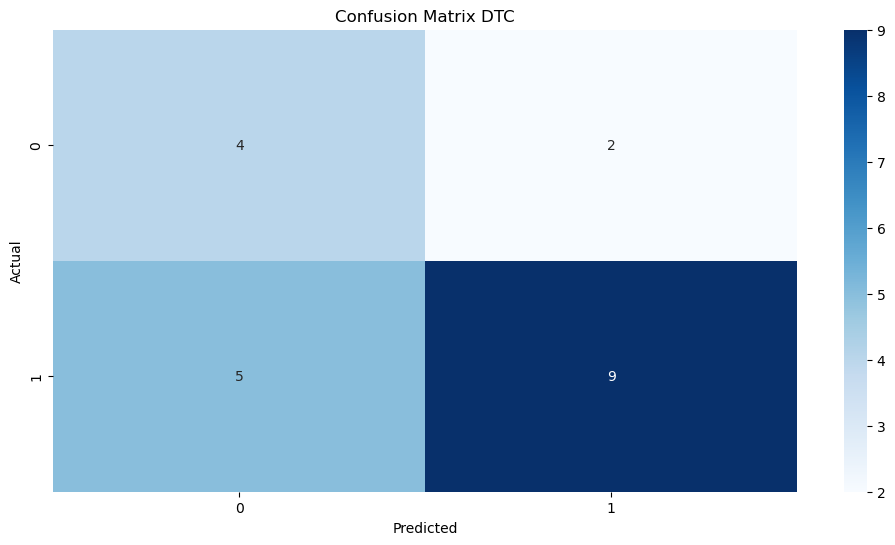

In [449]:
matrix_dtc = confusion_matrix(y_class_test,y_dtc_pred)
plt.figure(figsize=(12,6))
sns.heatmap(matrix_dtc,annot=True,fmt="d",cmap="Blues")
plt.title('Confusion Matrix DTC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [451]:
from sklearn.ensemble import RandomForestClassifier

In [467]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_class_train, y_class_train)

y_rfc_pred = rfc_model.predict(x_class_test)

accuracy_rfc = accuracy_score(y_class_test,y_rfc_pred)
print(accuracy_rfc*100,'%')

85.0 %


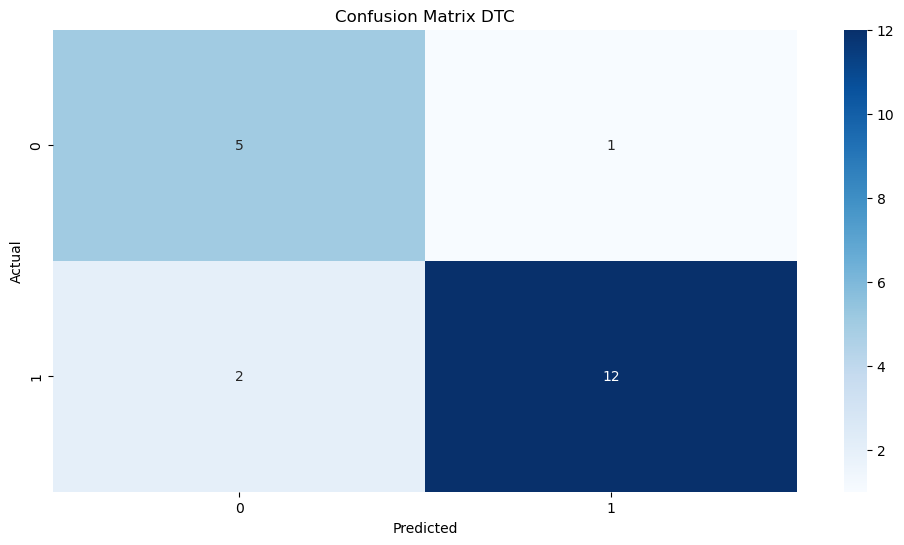

In [469]:
matrix_rfc = confusion_matrix(y_class_test,y_rfc_pred)
plt.figure(figsize=(12,6))
sns.heatmap(matrix_rfc,annot=True,fmt="d",cmap="Blues")
plt.title('Confusion Matrix DTC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()